In [ ]:
#import  necesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#loading dataset
from google.colab import files
  
uploaded = files.upload()

Saving stress.csv to stress (1).csv


In [ ]:
df = pd.read_csv('stress.csv')
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [ ]:
#Corelation between SL, stress level, and the rest of the attributes
x=df.corr()
x['sl']

sr      0.975322
rr      0.963516
t      -0.962354
lm      0.971071
bo     -0.961092
rem     0.951988
sr.1   -0.973036
hr      0.963516
sl      1.000000
Name: sl, dtype: float64

In [ ]:
#dropping the outcome column because K Means is an unsupervised algorithm
y=df['sl']
df=df.drop('sl', axis=1)

Text(0, 0.5, 'Snoring Rate')

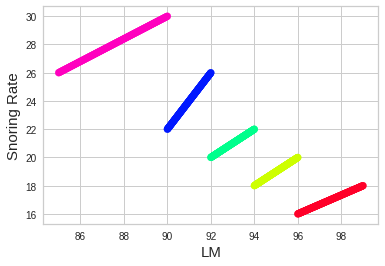

In [ ]:
#original clustering of the data
plt.scatter(df.iloc[:,2], df.iloc[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('LM', fontsize=15)
plt.ylabel('Snoring Rate', fontsize=15)

**Elbow method**

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

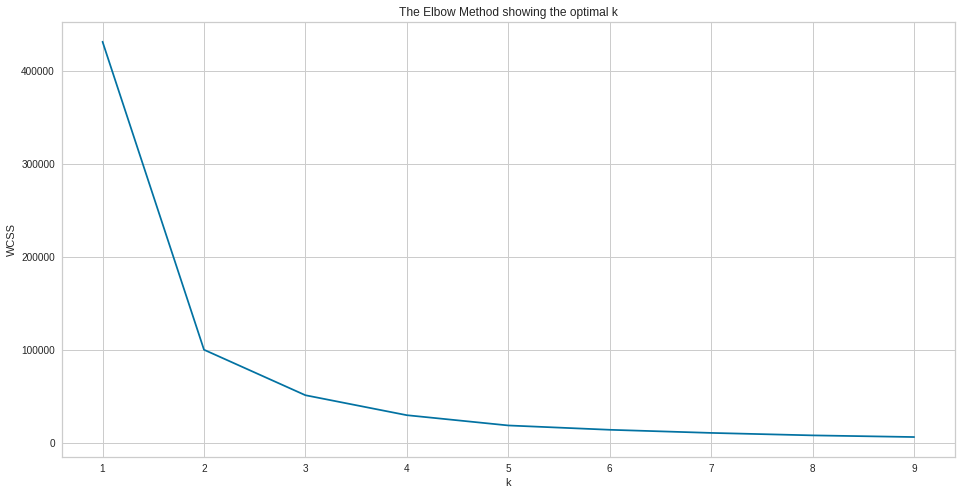

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the graph, we see that from when k=4, or four points are considered for clustering, the error is minimum. From point four, there is very little change in the clustering. Therefore, k=4 is being considered for the K Means clustering.

In [ ]:
km = KMeans(n_clusters = 4,random_state=21)
y_kmeans=km.fit(df)
y_kmeans

KMeans(n_clusters=4, random_state=21)

**Cluster to class analysis**

Text(0.5, 1.0, 'Predicted clustering')

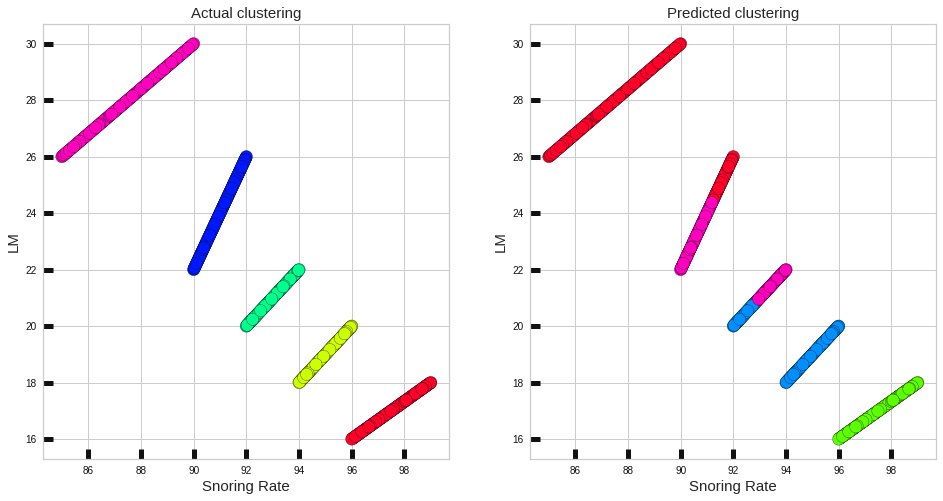

In [ ]:
#visual display of predicted clustering against the original
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df.iloc[:, 2], df.iloc[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df.iloc[:, 2], df.iloc[:, 1], c=new_labels, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Snoring Rate', fontsize=15)
axes[0].set_ylabel('LM', fontsize=15)
axes[1].set_xlabel('Snoring Rate', fontsize=15)
axes[1].set_ylabel('LM', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual clustering', fontsize=15)
axes[1].set_title('Predicted clustering', fontsize=15)

We see that there are five clusters in the original clustering. From the elbow method of evaluating the optimal value of k, 4 was choosen. Therefore, there is a change in the predicted clustering when compared to the actual clustering.

**Silhouette method**

In [ ]:
from sklearn.metrics import silhouette_score

#silhouette score for the clustering based on the k value choosen from the elbow method
score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.559


When k= 2 The average silhouette_score is : 0.6435345094415291
When k= 3 The average silhouette_score is : 0.5744682135621771
When k= 4 The average silhouette_score is : 0.5591742729628183
When k= 5 The average silhouette_score is : 0.5765212501985375


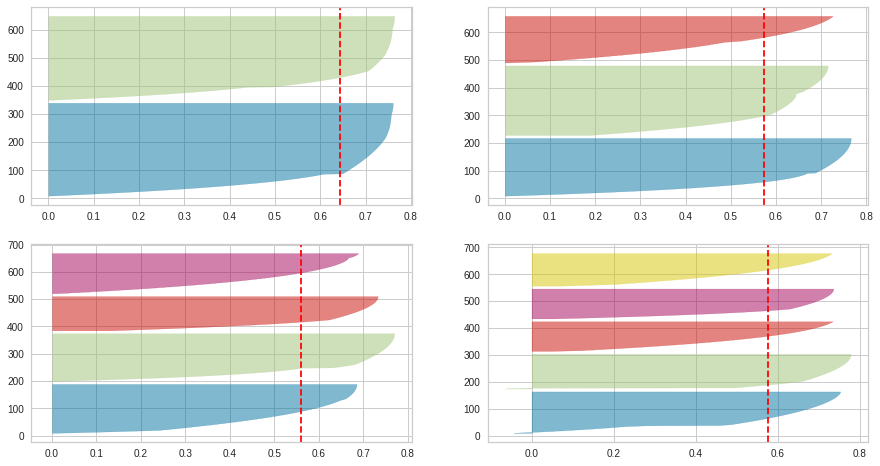

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples  

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

    clusterer =KMeans(n_clusters=i, random_state=10)  
    cluster_labels=clusterer.fit_predict(df)  
    
    #calculating the silhouette score for each value of k
    silhouette_avg=silhouette_score(df, cluster_labels)  
    print('When k=', i,'The average silhouette_score is :', silhouette_avg) 
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

Using the silhouette method, we have identified the optimal value of K with best performance is 5. Even though silhouette score is greatest when k=2, we cannot consider it. We know there are at least four clusters and this would cause area for error.

In [ ]:
km = KMeans(n_clusters = 5,random_state=21)
y_kmeans=km.fit(df)

Text(0.5, 1.0, 'Predicted clustering')

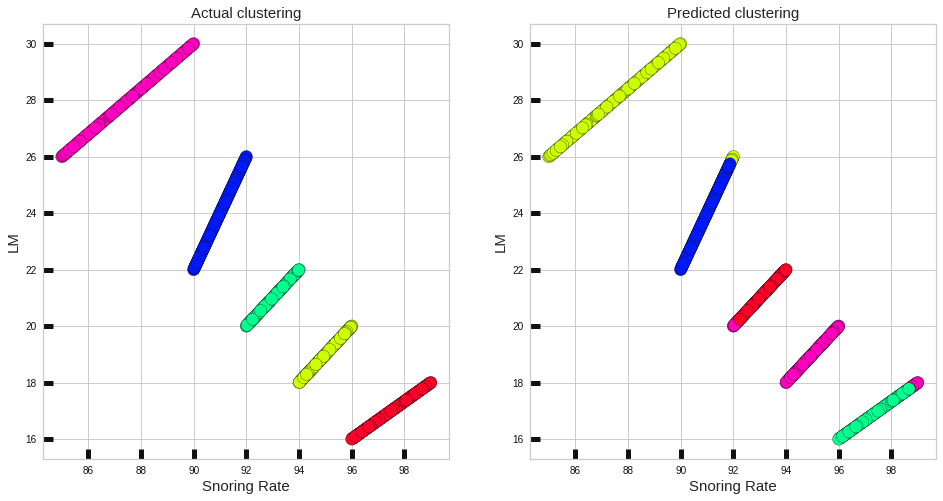

In [ ]:
#visual display of the change of clustering using the silhouette method to identify the optimal value for K.
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df.iloc[:, 2], df.iloc[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df.iloc[:, 2], df.iloc[:, 1], c=new_labels, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Snoring Rate', fontsize=15)
axes[0].set_ylabel('LM', fontsize=15)
axes[1].set_xlabel('Snoring Rate', fontsize=15)
axes[1].set_ylabel('LM', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual clustering', fontsize=15)
axes[1].set_title('Predicted clustering', fontsize=15)

The clustering has improved a little.

**K means after normalizing Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
#normalizing data
scaler = StandardScaler()
scaler.fit(df)

df = scaler.transform(df)
df = pd.DataFrame(df, columns = ['sr' , 'rr' ,	't' ,	'lm' ,	'bo' , 'rem' ,	'sr.1' ,	'hr'])
df

,sr,rr,t,lm,bo,rem,sr.1,hr
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636
...,...,...,...,...,...,...,...,...
625,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963
626,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337
627,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328
628,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841


When k= 2 The average silhouette_score is : 0.6068044907737777
When k= 3 The average silhouette_score is : 0.5721806859934312
When k= 4 The average silhouette_score is : 0.5731935090574352
When k= 5 The average silhouette_score is : 0.6488813381350484


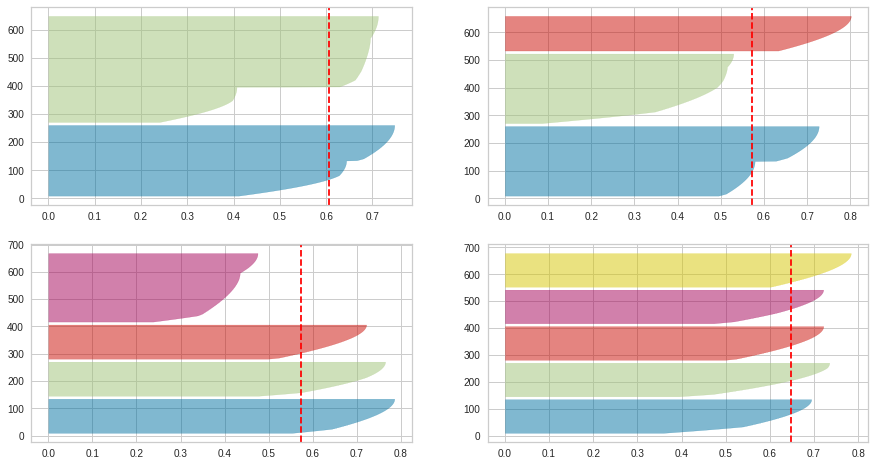

In [ ]:
#demonstrating the imporvement of clustering using the silhouette method after normalizing the data.
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples  

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

    clusterer =KMeans(n_clusters=i, random_state=10)  
    cluster_labels=clusterer.fit_predict(df)  
    
    #calculating the silhouette score for each value of k
    silhouette_avg=silhouette_score(df, cluster_labels)  
    print('When k=', i,'The average silhouette_score is :', silhouette_avg) 
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

In [ ]:
km = KMeans(n_clusters = 5,random_state=21)
y_kmeans=km.fit(df)

Text(0.5, 1.0, 'Predicted clustering')

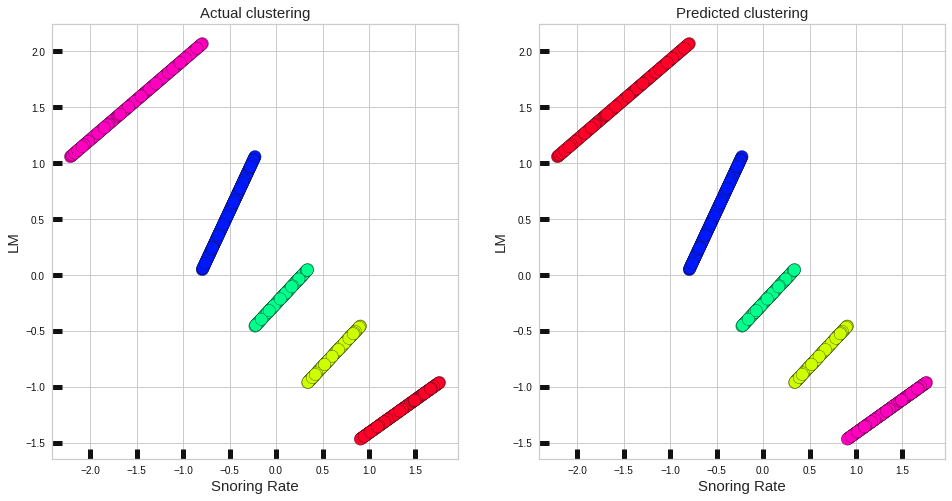

In [ ]:
#@title
#visual display of improved clustering after normalizing data
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df.iloc[:, 2], df.iloc[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(df.iloc[:, 2], df.iloc[:, 1], c=new_labels, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Snoring Rate', fontsize=15)
axes[0].set_ylabel('LM', fontsize=15)
axes[1].set_xlabel('Snoring Rate', fontsize=15)
axes[1].set_ylabel('LM', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual clustering', fontsize=15)
axes[1].set_title('Predicted clustering', fontsize=15)

Clustering imporved after normalizing data.